In [1]:
import numpy as np

class Graph:
    #TODO implement 8-point connectivity
    def __init__(self, pixel, goal, value, g=0, parent=None):
        self.pixel = pixel
        self.goal = goal
        self.parent = parent
        self.neighbors = {'u' : None, #up
                          'l' : None, #left
                          'd' : None, #down
                          'r' : None  #right
                          }
        self.h = self.heuristic()
        self.g = g
        self.obstacle = value
        self.f = self.h + self.g + 1e4 * self.obstacle
    
    def heuristic(self):
        pixel_arr = np.array(self.pixel)
        goal_arr = np.array(self.goal)
        return np.linalg.norm(goal_arr - pixel_arr)

    def add_neighbor(self, loc, npixel, nvalue):
        self.neighbors[loc] = Graph(npixel, self.goal, nvalue, g=self.g+1, parent=self)


In [203]:
a = Graph((1, 1), (2, 2), 0)
a.add_neighbor('u', (1, 2), 0)

In [204]:
a.neighbors['u'].g

1

In [48]:
#TODO check if x, y needs to be reversed
class A_star:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.shape = grid.shape
        self.start = start
        self.goal = goal
        self.graph = Graph(start, goal, grid[start[0], start[1]])
        self.O = [] # priority queue
        self.C = set() # visited nodes
        self.T = []
        self.path = None

    def _gen_path(self, node):
        curr = node
        order = []
        while curr:
            order.append(curr.pixel)
            curr = curr.parent
        self.path = order[::-1]
    
    def run(self):
        self.O.append(self.graph)
        tt = 0
        test = set()
        #ncurr = self.graph
        #self.C.append(self.graph)

        #while ncurr.pixel != self.goal:
        while self.O:
            ncurr = self.O.pop()
            self.T.append(ncurr)
            if ncurr.pixel in test:
                print(tt)
                print(test)
            test.add(ncurr.pixel)

            if ncurr.pixel == self.goal:
                #self.C.append(ncurr)
                self.O = list(filter(lambda x: x.f < ncurr.g, self.O))
            
            elif ncurr not in self.C:
                #self.C.append(ncurr)
                self.C.add(ncurr.pixel)
                if not ncurr.pixel[0] % 1:
                    pass
                    #print(ncurr.pixel, end='::')
                    #print(len(self.C), len(self.O), end=' >< ')
                for i, loc in enumerate(ncurr.neighbors.keys()):
                    move = (-1)**(0 < i < 3) * np.array([0**((i + 1) % 2), 0**(i % 2)]) # x,y
                    #move = (-1)**(0 < i < 3) * np.array([-0**(i % 2), 0**((i + 1) % 2)])  # y, x
                    next_pixel = tuple(np.array(ncurr.pixel) + move)
                    #C_pxs = [node.pixel for node in self.C]
                    O_pxs = [node.pixel for node in self.O]

                    if (next_pixel not in self.C) and (next_pixel not in O_pxs):
                        if (next_pixel[0] >= 0 and next_pixel[1] >= 0) and (next_pixel[0] < self.shape[0] 
                            and next_pixel[1] < self.shape[1]):
                                nvalue = self.grid[next_pixel[0], next_pixel[1]]
                                ncurr.add_neighbor(loc, next_pixel, nvalue)
                                self.O.append(ncurr.neighbors[loc])
                
                self.O.sort(key=lambda x : x.f, reverse=True)
                if tt == 0:
                    print([(node.pixel, node.f) for node in self.O])
            #ncurr = self.O.pop()
            tt += 1
        self._gen_path(ncurr)



In [287]:
grid = np.zeros((6,6))
goal = (5, 0)
start = (1, 5)
grid[0:4, 1:3] = 1
grid[4, 3] = 1
test = A_star(grid, (5,1), (0,5))

grid[0, 5] = 2
grid[5, 1] = 3
grid

array([[0., 1., 1., 0., 0., 2.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 3., 0., 0., 0., 0.]])

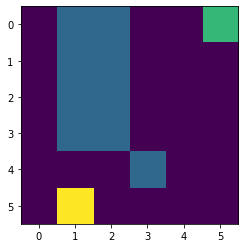

In [227]:
import matplotlib.pyplot as plt

plt.imshow(grid)
plt.show()

In [228]:
import cv2
cv2.transpose(grid)

array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 3.],
       [1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0.]])

In [288]:
test.run()

[((5, 0), 8.071067811865476), ((5, 2), 6.830951894845301), ((4, 1), 6.656854249492381)]


In [283]:
test.graph.neighbors['r'].neighbors['r'].neighbors['r'].g

3

In [279]:
ttt = test.T
a = list(filter(lambda x: x.f < 10, ttt))
print([n.pixel for n in a])
print()
print([n.pixel for n in ttt])

[(5, 1), (4, 1), (5, 2), (4, 2), (5, 3), (5, 0), (5, 4), (4, 4), (3, 4), (2, 4), (4, 0), (1, 4), (3, 0), (1, 5), (0, 4), (2, 5), (3, 5), (4, 5), (5, 5), (2, 0), (3, 3), (2, 3)]

[(5, 1), (4, 1), (5, 2), (4, 2), (5, 3), (5, 0), (5, 4), (4, 4), (3, 4), (2, 4), (4, 0), (1, 4), (3, 0), (1, 5), (0, 4), (2, 5), (3, 5), (4, 5), (5, 5), (2, 0), (3, 3), (2, 3), (1, 0), (1, 3), (0, 0), (0, 3), (3, 1), (3, 2), (4, 3), (2, 1), (1, 1), (0, 1), (2, 2), (1, 2), (0, 2), (0, 5)]


In [237]:
a = set()

(5,2) in a

False

In [183]:
print(test.graph.pixel)
for key, item in test.graph.neighbors.items():
    print(key, item)

(5, 1)
u <__main__.Graph object at 0x7f0164224c70>
l <__main__.Graph object at 0x7f0163ee9330>
d None
r <__main__.Graph object at 0x7f0163eeb040>


In [184]:
print(test.graph.neighbors['l'].f)
print(test.graph.neighbors['r'].f)

8.071067811865476
6.830951894845301


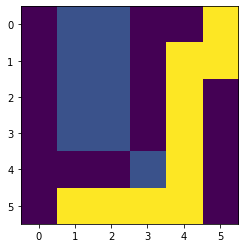

In [289]:
p = test.lastp
order = []
while p:
    order.append(p.pixel)
    grid[p.pixel] = 4
    p = p.parent
order[::-1]

plt.imshow(grid)
plt.show()

In [80]:
for i in range(1,6):
    print(f'5%{i} = ', 7%(i+1))

5%1 =  1
5%2 =  1
5%3 =  3
5%4 =  2
5%5 =  1


In [46]:
import os
import cv2

height, width = (16, 16) # in meters
scale = 28 # meters / pixel
def meters2pixels(coord):
    """Converts coordinate in meters to pixel coordinate.
    """
    xm, ym = coord
    xp = int(np.round(scale * (xm + width // 2)))
    yp = int(np.round(scale * (-ym + height // 2)))
    coord_pixels = (xp, yp)
    
    return coord_pixels

grid_path = os.path.join('catkin_ws/src/wavefront', 'worlds/grid1.npy')
grid = np.load(grid_path)
#grid = cv2.transpose(grid)

start = (-6, 2)
start_ = meters2pixels(start)
goal = (5, 2)
goal_ = meters2pixels(goal)
mapa = grid.copy()

mapa[goal_[1], goal_[0]] = 2
mapa[start_[1], start_[0]] = 3
grid


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint64)

In [33]:
grid = cv2.transpose(grid)
np.save('catkin_ws/src/Astar/worlds/grid1.npy', grid)
grid

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [29]:
grid = cv2.transpose(grid)

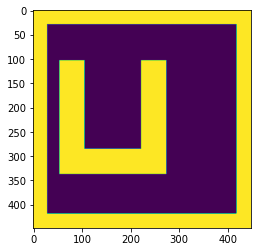

In [47]:
import matplotlib.pyplot as plt

plt.imshow(grid)
plt.show()

In [49]:
#test = A_star(grid, (start_[1],start_[0]), (goal_[1],goal_[0]))
test = A_star(grid, start_, goal_)
test.run()

[((55, 168), 310.0), ((56, 169), 309.00162337234525), ((56, 167), 309.00162337234525), ((57, 168), 308.0)]


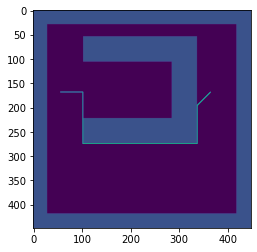

In [297]:
p = test.lastp
order = []
while p:
    order.append(p.pixel)
    mapa[p.pixel] = 4
    p = p.parent
#order[::-1]

plt.imshow(mapa)
plt.show()

In [52]:
import plotly.express as px
import plotly.graph_objects as go

a = np.array(list(map(list, zip(*test.path))))
fig = px.imshow(0**grid, binary_string=True)
fig.add_trace(go.Scatter(x=a[0,:].ravel(), y=a[1,:].ravel(), name='Caminho do Robô', showlegend=True))
fig.show()

In [43]:
import pandas as pd
df = pd.read_csv('/home/fbartelt/Documents/UFMG/Planejamento/logs/astar_path.csv', index_col=0)
df

,0,1
0,168,56
1,168,57
2,168,58
3,168,59
4,168,60
...,...,...
516,170,362
517,170,363
518,169,363
519,169,364


In [45]:
fig = px.imshow(0**grid, binary_string=True)
fig.add_trace(go.Scatter(x=df['1'], y=df['0'], name='Caminho do Robô', showlegend=True))
fig.show()

In [55]:
def pixels2meters(coord):
    """Converts pixels coordinate to coordinate in meters.
    """
    xp, yp = coord
    xm = xp / scale - width // 2
    ym = -yp / scale + height // 2
    coord_meters = (xm, ym)
    
    return coord_meters

pixels2meters((168, 56))

(-2.0, 6.0)

In [62]:
import time

a = time.time()
time.sleep(1.234)
b = time.time()
tt = b - a
m, s = divmod(tt, 60)
ss = '{:.2}min {:.2}s'.format(m, s)
print(ss)

0.0min 1.2s


In [63]:
mapa[None]

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]], dtype=uint64)

# Trapezoidal

In [34]:
width, height = (32, 22.5) # in meters
scale = 14 # meters / pixel

def meters2pixels(coord):
    """Converts coordinate in meters to pixel coordinate.
    """
    xm, ym = coord
    xp = int(np.round(scale * (xm + width // 2)))
    yp = int(np.round(scale * (-ym + height // 2)))
    coord_pixels = (xp, yp)
    
    return coord_pixels

def pixels2meters(coord):
    """Converts pixels coordinate to coordinate in meters.
    """
    xp, yp = coord
    xm = xp / scale - width // 2
    ym = -yp / scale + height // 2
    coord_meters = (xm, ym)
    
    return coord_meters

In [85]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import cv2
#img = cv2.imread('trapz.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('catkin_ws/src/coverage/worlds/trapz2.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('/home/fbartelt/Documents/UFMG/Planejamento/TPs/trapz2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
df = pd.read_csv('logs/coverage.csv', index_col=0)
#img = img / 255
points = df.to_numpy()
pt_px = [meters2pixels((x[0], x[1])) for x in points]
pxs = list(zip(*pt_px))
colormap = list(map(lambda x: px.colors.qualitative.Plotly[int(x-1)], df['2']))

fig = px.imshow(img)
fig.add_scatter(x=pxs[0], y=pxs[1], mode='markers', marker_size=3, marker_symbol='star',
                marker_color = colormap, showlegend=False, opacity=0.75)
for i, color in enumerate(px.colors.qualitative.Plotly):
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker_color=color, 
                             name=f'C{i+1}', marker_symbol='star', showlegend=True))
fig.update_xaxes(range=[0, 452])
fig.update_yaxes(range=[315, 0])
fig.show()

In [17]:
c1 = Cell([20, 144], [133, 107], 1, [[133, 54], [133, 250]])
c2 = Cell([142, 116], [168, 178], 2, [[168, 123], [168, 277], [[142, 256]]])
c3 = Cell([179, 164], [200, 142], 3, [[179, 128]])
c4 = Cell([178, 181], [204, 303], 4, [[178, 285], [204, 168]]) 
c5 = Cell([208, 306], [272, 149], 5, [[208, 165], [272, 293]]) 
c6 = Cell([282, 142], [339, 173], 6, [[282, 291], [339, 275], [282, 24], [339, 42]]) 
c7 = Cell([348, 181], [430, 243], 7, [[348, 272]]) 
c8 = Cell([348, 163], [438, 75], 8, [[348, 43]]) 
c9 = Cell([214, 12], [272, 134], 9, [[272, 21], [214, 124]]) 
c10 = Cell([144, 101], [210, 9], 10, [[144, 46], [210, 122]]) 

In [10]:
class Cell:
    def __init__(self, left_corner, right_corner, val, other_lims=[]):
        self.val = val
        self.left_corner = left_corner
        self.right_corner = right_corner
        self.left_neighbors = []
        self.right_neighbors = []
        self.other_lims = other_lims

    def add_neighbor(self, neighbor):
        if neighbor.right_corner > self.right_corner:
            self.right_neighbors.append(neighbor)
            self.right_neighbors.sort(key=lambda x : -x.right_corner[0])
        else:
            self.left_neighbors.append(neighbor)
            self.left_neighbors.sort(key=lambda x : -x.left_corner[0])


In [59]:
c1 = Cell([7, 121], [27, 110], 1)
c2 = Cell([32, 89], [38, 14], 2)
c3 = Cell([29, 114], [59, 244], 3)
c4 = Cell([43, 8], [50, 49], 4) 
c5 = Cell([52, 53], [79, 32], 5) 
c6 = Cell([63, 244], [98, 186], 6) 
c7 = Cell([83, 24], [196, 9], 7) 
c8 = Cell([81, 34], [139, 95], 8) 
c9 = Cell([103, 186], [144, 108], 9) 
c10 = Cell([146, 106], [144, 211], 10) 
c11 = Cell([148, 197], [171, 104], 11) 
c12 = Cell([148, 218], [180, 248], 12) #
c13 = Cell([185, 242], [218, 102], 13)
c14 = Cell([200, 12], [217, 94], 14)
c15 = Cell([220, 98], [250, 80], 15)

In [22]:
#corners = [
#           [4, 121], [31, 110], [39, 4], [48, 56], [58, 248], [81, 28], 
#           [100, 183], [143, 101], [147, 215], [174, 104], [184, 250],
#           [198, 7], [218, 97], [252, 80]
#           ]
#c_list = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15]
c_list = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10]
#corners = [tuple(x) for x in corners]
#for corner in corners:
for cell in c_list:
    print(cell.val, cell.left_corner, cell.right_corner)
    lcorner = cell.left_corner
    rcorner = cell.right_corner
    img[lcorner[1]-4:lcorner[1]+4, lcorner[0]-4:lcorner[0]+4] = cell.val + 1
    img[rcorner[1]-4:rcorner[1]+4, rcorner[0]-4:rcorner[0]+4] = cell.val + 1
    #img[corner[1], corner[0]] = 2

fig = px.imshow(img, color_continuous_scale='Rainbow')
fig.show()

1 [20, 144] [133, 107]
2 [142, 116] [168, 178]
3 [179, 164] [200, 142]
4 [178, 181] [204, 303]
5 [208, 306] [272, 149]
6 [282, 142] [339, 173]
7 [348, 181] [430, 243]
8 [348, 163] [438, 75]
9 [214, 12] [272, 134]
10 [144, 101] [210, 9]


In [ ]:
c1.add_neighbor(c2)
c1.add_neighbor(c3)
c2.add_neighbor(c4)
c2.add_neighbor(c1)
c3.add_neighbor(c1)
c3.add_neighbor(c6)
c4.add_neighbor(c2)
c4.add_neighbor(c5)
c5.add_neighbor(c4)
c5.add_neighbor(c7)
c5.add_neighbor(c8)
c6.add_neighbor(c3)
c6.add_neighbor(c9)
c7.add_neighbor(c5)
c7.add_neighbor(c14)
c8.add_neighbor(c5)
c8.add_neighbor(c10)
c9.add_neighbor(c6)
c9.add_neighbor(c10)
c10.add_neighbor(c8)
c10.add_neighbor(c9)
c10.add_neighbor(c11)
c10.add_neighbor(c12)
c11.add_neighbor(c10)
c12.add_neighbor(c10)
c12.add_neighbor(c13)
c13.add_neighbor(c12)
c13.add_neighbor(c15)
c14.add_neighbor(c7)
c14.add_neighbor(c15)
c15.add_neighbor(c14)
c15.add_neighbor(c13)

In [25]:
c1.add_neighbor(c2)
c1.add_neighbor(c10)
c2.add_neighbor(c1)
c2.add_neighbor(c3)
c2.add_neighbor(c4)
c3.add_neighbor(c2)
c4.add_neighbor(c2)
c4.add_neighbor(c5)
c5.add_neighbor(c6)
c5.add_neighbor(c4)
c6.add_neighbor(c5)
c6.add_neighbor(c7)
c6.add_neighbor(c8)
c6.add_neighbor(c9)
c7.add_neighbor(c6)
c8.add_neighbor(c6)
c9.add_neighbor(c6)
c9.add_neighbor(c10)
c10.add_neighbor(c9)
c10.add_neighbor(c1)

In [26]:
#lista = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15]
lista = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10]

In [27]:
import pickle

with open('catkin_ws/src/coverage/worlds/trapz_dec2.pickle', 'wb') as handle:
    pickle.dump(lista, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [28]:
import pickle
with open('catkin_ws/src/coverage/worlds/trapz_dec2.pickle', 'rb') as handle:
    test = pickle.load(handle)

In [29]:
for cell in test:
    print(f'\nSelf {cell.val}:', (cell.left_corner, cell.right_corner), end='  ')
    print('Neighbors', end=': ')
    if cell.left_neighbors:
        print('l',[x.val for x in cell.left_neighbors], end=';\t')
        #print([(x.left_corner, x.right_corner) for x in cell.left_neighbors])
    if cell.right_neighbors:
        print('r',[x.val for x in cell.right_neighbors], end='')
        #print([(x.left_corner, x.right_corner) for x in cell.right_neighbors])


Self 1: ([20, 144], [133, 107])  Neighbors: r [10, 2]
Self 2: ([142, 116], [168, 178])  Neighbors: l [1];	r [4, 3]
Self 3: ([179, 164], [200, 142])  Neighbors: l [2];	
Self 4: ([178, 181], [204, 303])  Neighbors: l [2];	r [5]
Self 5: ([208, 306], [272, 149])  Neighbors: l [4];	r [6]
Self 6: ([282, 142], [339, 173])  Neighbors: l [9, 5];	r [8, 7]
Self 7: ([348, 181], [430, 243])  Neighbors: l [6];	
Self 8: ([348, 163], [438, 75])  Neighbors: l [6];	
Self 9: ([214, 12], [272, 134])  Neighbors: l [10];	r [6]
Self 10: ([144, 101], [210, 9])  Neighbors: l [1];	r [9]

In [107]:
states = {0 : 'Going back', 1 : 'Moving to new cell'}
state = 1
def change_state(n):
    global state
    state = n
    print(states[n])

def reorder(neighbors, visited):
    n = neighbors.copy()
    nset = set(n)
    intersec = list(nset.intersection(visited))
    
    if intersec:
        uniq_seen = [x for x in n if x not in intersec]
    else:
        uniq_seen = n

    return uniq_seen, intersec

def find_newcell(cell, seen, visited):
    queue = seen.copy()
    next_cell = queue.pop()
    while next_cell in visited:
        next_cell = queue.pop()

    return next_cell

def dijkstra(cell, seen, visited, goal):
    O = [] # priority queue
    C = set() # visited nodes
    O.append((cell, None, 0))
    T = []
    paths = []
    tt = 0
    test = set()
    #ncurr = self.graph
    #self.C.append(self.graph)

    #while ncurr.pixel != self.goal:
    while O:
        ncurr, parent, cost = O.pop()
        #if parent:
        #    print(f'h {ncurr.val}  p{parent.val}  c{cost}')
        #else:
        #    print(f'h {ncurr.val} c{cost}')

        if ncurr == goal:
            #self.C.append(ncurr)
            O = list(filter(lambda x: x[2] < cost, O))
        
        elif ncurr not in C:
            #self.C.append(ncurr)
            C.add(ncurr)
            T.append((ncurr, parent, cost))
            nlist = []
            nlist.extend(ncurr.left_neighbors)
            nlist.extend(ncurr.right_neighbors)

            for neighbor in nlist:
                #move = (-1)**(0 < i < 3) * np.array([0**((i + 1) % 2), 0**(i % 2)]) # x,y
                #move = (-1)**(0 < i < 3) * np.array([-0**(i % 2), 0**((i + 1) % 2)])  # y, x
                #C_pxs = [node.pixel for node in self.C]

                if (neighbor not in C) and (neighbor not in O):
                    O.append((neighbor, ncurr, cost+1))
            
            O.sort(key=lambda x : x[2], reverse=True)
            
    path = []
    
    while parent:
        path.append(ncurr)
        temp = [x for x in T if x[0] == parent]
        ncurr = temp[0][0]
        parent = temp[0][1]

    T.append((ncurr, parent, cost))
    return O, C, path

    
def gen_path(cells, init_pos, total_cells, init_cell=-1):
    uncovered = 1
    visited = []
    seen = []
    counter = 0
    O, C, T = [], [], []

    if init_cell == -1:
        for cell in cells:
            #print(cell)
            if (cell.left_corner[0] <= init_pos[0] <= cell.right_corner[0]): #and
                    #cell.left_corner[1] <= init_pos[1] <= cell.right_corner[1]):
                init_cell = cell
                break

    seen.append(init_cell)
    print(init_cell.val)
    change_state(1)

    while uncovered:
        curr_C = seen.pop()
        test = curr_C
        visited.append(curr_C)
        local_seen = []
        local_vis = []
        if len(set(visited)) == total_cells:
            uncovered = 0
            break
        
        if state:
            if curr_C.left_neighbors:
                l_seen, l_vis = reorder(curr_C.left_neighbors, visited)
                local_vis.extend(l_vis)
                local_seen.extend(l_seen)
            if curr_C.right_neighbors:
                r_seen, r_vis = reorder(curr_C.right_neighbors, visited)
                local_vis.extend(r_vis)
                local_seen.extend(r_seen)

            if not local_seen:
                change_state(0)
                if len(local_vis) > 1:
                    test = find_newcell(curr_C, seen, visited)
                    _, _, T = dijkstra(curr_C, seen, visited, test)
                    local_vis.extend(T)
                    local_seen = T

        if not state and curr_C == test:
            change_state(1)
            

        #l_vis.extend(r_vis)
        #l_seen.extend(r_seen)
        seen.extend(local_vis)
        seen.extend(local_seen)
        
        if counter > 10000:
            uncovered = 0
            break
        counter += 1
    return seen, visited

In [47]:
t = [1, 2, 3]
t.extend([4, 5])
t

[1, 2, 3, 4, 5]

In [56]:
t = [c1, c2, c3]
tt = [c4, c7, c5]
aux = set(t)
inter = aux.intersection(tt)
if inter:
    print(list(x.val for x in inter))

In [110]:
test[5].val

6

In [117]:
#a, b, O, C, T = gen_path(test, (10, 122), 15)
a, b, O, C, T = gen_path(test, (190, 90), 15, test[10])

11
Moving to new cell
Going back
Moving to new cell


In [118]:
print('visited:', [x.val for x in b])
print('queue', [x.val for x in a])

visited: [11, 10, 12, 13, 15, 14, 7, 5, 8, 5, 4, 2, 1, 3, 6, 9]
queue [11, 9, 8, 10, 12, 13, 15, 14, 7, 4, 5, 10, 4, 5, 5, 4, 2, 1, 3]


In [85]:
b = [4, 121]
a = [31, 110]
init_pos = (10, 122)

if (b[0] <= init_pos[0] <= a[0] and
        b[1] <= init_pos[1] <= a[1]):
    print('AAA')

In [86]:
b[0] <= init_pos[0] <= a[0]

True

In [10]:
pixels2meters((22, 118))

(-13.25, 1.25)

In [14]:
lista = [1, 2, 3, 4, 5]
v = lista[::-1]
v.pop()
print(lista, v)

[1, 2, 3, 4, 5] [5, 4, 3, 2]


In [16]:
b = [1, 2]
c, d = b

In [21]:
np.linalg.norm(np.array([1, 2]) - [3, 4])

2.8284271247461903

In [23]:
from collections import deque

a = deque([1, 2, 3, 4])

In [30]:
a.rotate(-1)
a

deque([3, 4, 1, 2])

In [31]:
a[0]

3

In [1]:
import numpy as np
np.array(pixels2meters([50, 49]))

NameError: name 'pixels2meters' is not defined

In [7]:
test = np.array([[2, 4], [4, 5], [3, 3], [10, 8], [10, 1], [100, 100]])
a = np.array([10, 9])
any(np.linalg.norm(a - test, axis=1) <= 2)

True

In [29]:
#test = np.array([[]])
point = np.array([[5, 6]])
if test.size != 0:
    test = np.r_[np.array(test), point]
else:
    test = point
test

array([[1, 2],
       [1, 2],
       [3, 4],
       [5, 6]])

In [30]:
np.minimum(-29, -25)

-29

In [50]:
a = np.arange(10, 22)
ignore = np.arange(len(a))
np.random.default_rng().shuffle(ignore)
print(ignore)
ignore = ignore[:int(0.8*len(ignore))]
print(a)
print(sorted(ignore), len(ignore))
print((a[sorted(ignore)]))



[ 7  3  0  1  8 11  9  5  4  2 10  6]
[10 11 12 13 14 15 16 17 18 19 20 21]
[0, 1, 3, 4, 5, 7, 8, 9, 11] 9
[10 11 13 14 15 17 18 19 21]


In [52]:
from collections import deque
a = deque([1, 2, 3])
a.rotate(-1)
a

deque([2, 3, 1])